The Use-Case chosen is to predict the chances of an employee getting promoted inside of an organization and what are the factors that impact the promotion chances. The dataset was sourced from Analytics Vidhya Hackathon hosted by WNS Analytics. 


This notebook will run you through the below :

1) Exploratory Data Analysis


2) Feature Engineering

3) Imbalanced Class Treatment

4) Model Building

5) Model Evaluation


Let's load the dataset and perform Summary Statistics


In [ ]:
import pandas as pd
df = pd.read_csv("employee_promotion_data.csv")

In [ ]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
df.shape

(54808, 14)

In [ ]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

Exploratory Data Analysis

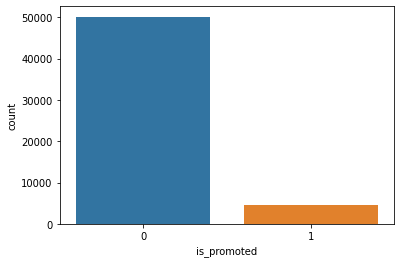

In [ ]:
#Distribution of the Target Variable ( Is_Promoted)
import pandas.util.testing as tm
import seaborn as sns
sns.countplot(df['is_promoted'])

The Dependent Variable is imbalanced with approximately 8% of them being promoted from the sample data. 

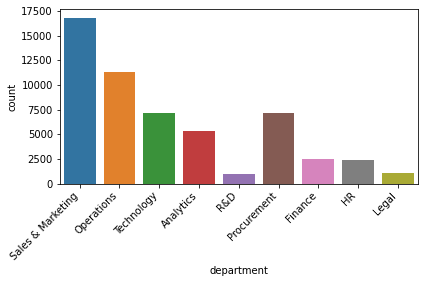

In [ ]:
#Number of employees across departments 
import matplotlib.pyplot as plt
ax = sns.countplot(x="department", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()



Sales and Marketing department had the highest number of employees of around 16000 employees followed by Operations at 11000 headcount and the legal team being the least at 1000 employees 

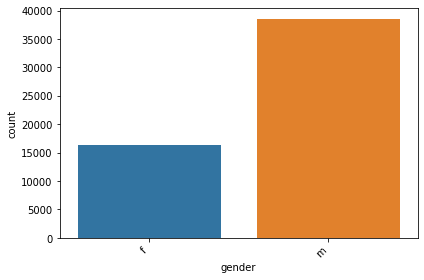

In [ ]:
#Gender Distribution
ax = sns.countplot(x="gender", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()


Gender Ratio of the employees stood at a ratio of 1:3 from the graph shown above


Let's answer some Business Questions? 

1) What was the promotion rate across departments?

2) What was the promotion rate across Gender?

3) What was the promotion rate across recruitment channels?


4) What was the promotion rate across Ratings for the previous year?

In [ ]:
#Departments

pd.crosstab(df['department'],df['is_promoted']).apply(lambda r: r/r.sum(), axis=1)


is_promoted,0,1
department,,
Analytics,0.904335,0.095665
Finance,0.918770,0.081230
HR,0.943755,0.056245
Legal,0.948989,0.051011
Operations,0.909852,0.090148
Procurement,0.903614,0.096386
R&D,0.930931,0.069069
Sales & Marketing,0.927969,0.072031
Technology,0.892407,0.107593


The Technology department had the highest promotion rate of 10%, whereas the Legal department had the lowest promotion rate of 5%. The Promotion Rate were not consistent across different departments 


In [ ]:
#Gender
pd.crosstab(df['gender'],df['is_promoted']).apply(lambda r: r/r.sum(), axis=1)

is_promoted,0,1
gender,,
f,0.910066,0.089934
m,0.916849,0.083151


It is interesting to note that Promotion Rate was uniform and consistent across Genders with 8.5% of them getting promoted



In [ ]:
#Recruitment Channels
pd.crosstab(df['recruitment_channel'],df['is_promoted']).apply(lambda r: r/r.sum(), axis=1)

is_promoted,0,1
recruitment_channel,,
other,0.916048,0.083952
referred,0.879159,0.120841
sourcing,0.914987,0.085013


From the crosstab output above, the reffered candidates had the highest promotion rate of 12 %

In [ ]:
#Ratings
pd.crosstab(df['previous_year_rating'],df['is_promoted']).apply(lambda r: r/r.sum(), axis=1)

is_promoted,0,1
previous_year_rating,,
1.0,0.985859,0.014141
2.0,0.957160,0.042840
3.0,0.927221,0.072779
4.0,0.920624,0.079376
5.0,0.836385,0.163615


Employees who had a previous year rating of 5 had the highest promotion rate of 16%, it is however interesting to note that Ratings of 3 and 4 had an almost similar proportion levels of employees being promoted at 7%


Feature Engineering


Let's look at the missing values in the data and impute these mising values.



In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values(by='percent_missing', ascending=False, inplace=True)


In [ ]:
missing_value_df

,column_name,percent_missing
previous_year_rating,previous_year_rating,7.524449
education,education,4.395344
employee_id,employee_id,0.000000
department,department,0.000000
region,region,0.000000
gender,gender,0.000000
recruitment_channel,recruitment_channel,0.000000
no_of_trainings,no_of_trainings,0.000000
age,age,0.000000
length_of_service,length_of_service,0.000000


We are going to impute the categorical variable - Education with "999" and the Previous Year Rating Variable with the mode value


In [ ]:
#Checking the most frequently occuring value of the Previous Year Rating Variable
df['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [ ]:
#Missing value imputation
df['previous_year_rating'].fillna(3.0, inplace=True)
df['education'].fillna("999",inplace=True)

Binning of Variables:
We are going to peform binning operations on variables - Age and Training Score


Text(0, 0.5, 'Frequency Count')

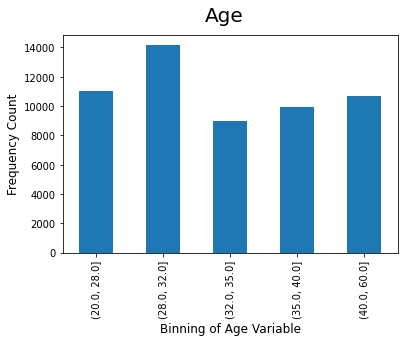

In [ ]:
df['age_bins'] = pd.qcut(df['age'], q=5)
df['age_bins']  = df['age_bins'] .apply(lambda x: pd.Interval(left=round(x.left,2), right=round(x.right,2)))
sbp_vals = df['age_bins'].value_counts(sort=False)

fig = plt.figure()
sbp_vals.plot(kind='bar')
fig.suptitle('Age', fontsize=20)
plt.xlabel('Binning of Age Variable', fontsize=12)
plt.ylabel('Frequency Count', fontsize=12)

Age bracket of 28-32 had most number of employees with 14000 employees and the Age Bracket 32 - 35 had the least employees with 9000 of the total. The Ages were binned based on the Quantiles of 5(Every 20th Percentile)

Text(0, 0.5, 'Frequency Count')

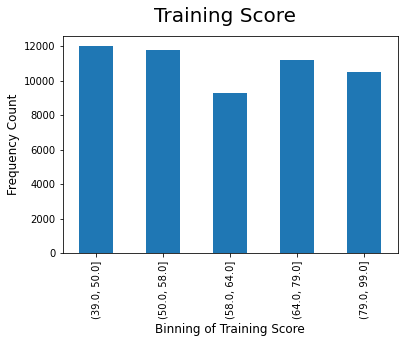

In [ ]:
df['training_score_bins'] = pd.qcut(df['avg_training_score'], q=5)
df['training_score_bins']  = df['training_score_bins'] .apply(lambda x: pd.Interval(left=round(x.left,2), right=round(x.right,2)))
sbp_vals = df['training_score_bins'].value_counts(sort=False)

fig = plt.figure()
sbp_vals.plot(kind='bar')
fig.suptitle('Training Score', fontsize=20)
plt.xlabel('Binning of Training Score', fontsize=12)
plt.ylabel('Frequency Count', fontsize=12)

Imbalanced Class Treatment


In [ ]:
df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

The Promotion Rate is at 8.5% and there is a class imbalance problem. To overcome this issue, there are techniques like SMOTE, Adasyn and Undersampling of the majority class. In this use-case, we will see how to undersample the majority class whereas retaining the promotion rate category as such.


In [ ]:
df.dtypes

employee_id                int64
department                object
region                    object
education                 object
gender                    object
recruitment_channel       object
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
KPIs_met >80%              int64
awards_won?                int64
avg_training_score         int64
is_promoted                int64
age_bins                category
training_score_bins     category
dtype: object

In [ ]:
df['age_bins'] = df['age_bins'].astype('object')
df['training_score_bins'] = df['training_score_bins']. astype('object')
del df['age']
del df['avg_training_score']

In [ ]:
#create dummy variables
df_dummies = pd.get_dummies(df)

In [ ]:
df_dummies.shape

(54808, 69)

The next step would be to do a 70-30 Training and Testing Data split. Followed by, undersampling the majority class on the training data and merging it  the imbalanced class on the training data as-is.

This is then followed by building Machine Learning Models on the Training Data and evaluating it against a test set.


In [ ]:
Y = df_dummies['is_promoted']


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_dummies, Y, test_size=0.3, random_state=1)

In [ ]:
x_train_0 = x_train[x_train['is_promoted'] == 0]
x_train_1 = x_train[x_train['is_promoted'] == 1]

In [ ]:
x_train['is_promoted'].value_counts()

0    35082
1     3283
Name: is_promoted, dtype: int64

We take 10% of the the Majority class and merge it with the imbalanced class in the training data to get a balanced class ratio of 50% each 


In [ ]:
x_train_0 = x_train_0.sample(frac = 0.1)

In [ ]:
X_train = x_train_0.append(x_train_1)

In [ ]:
X_train['is_promoted'].value_counts()

0    3508
1    3283
Name: is_promoted, dtype: int64

In [ ]:
y_train = X_train['is_promoted']
del X_train['is_promoted']

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6791, 68)
(6791,)
(16443, 69)
(16443,)


In [ ]:
y_test.value_counts()

0    15058
1     1385
Name: is_promoted, dtype: int64

In [ ]:
del x_test['is_promoted']


In [ ]:
del X_train['employee_id']
del x_test['employee_id']

Model Building


We are going to build the model using the Random Forest Algorithm and evaluate the model outcomes.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
rf = RandomForestClassifier(n_estimators=100)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rf = rf.predict(x_test)
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84     15058
           1       0.23      0.83      0.36      1385

    accuracy                           0.75     16443
   macro avg       0.60      0.79      0.60     16443
weighted avg       0.92      0.75      0.80     16443



The model has an Accuracy of 75% and the model has a high recall value of 83% for the employees that were predicted with a promotion


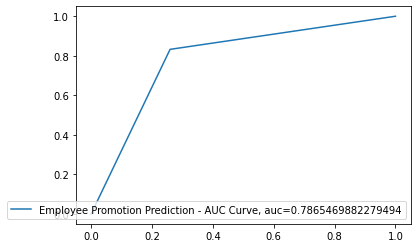

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_rf)
auc =metrics.roc_auc_score(y_test, y_pred_rf)
plt.plot(fpr,tpr,label="Employee Promotion Prediction - AUC Curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

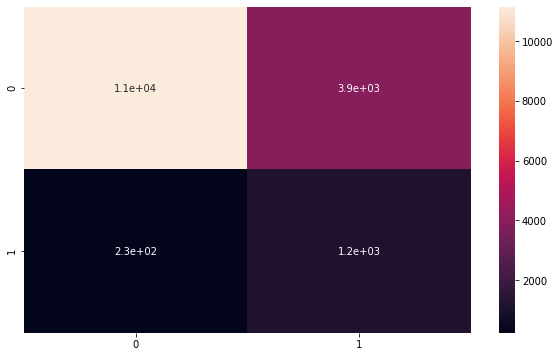

In [ ]:
cm =confusion_matrix(y_test, y_pred_rf)  
index = ['Not Promoted','Promoted']  
columns = ['Not Promoted','Promoted']    

plt.figure(figsize=(10,6))  
sns.heatmap(cm, annot=True)

In [ ]:
cm

array([[11152,  3906],
       [  232,  1153]])

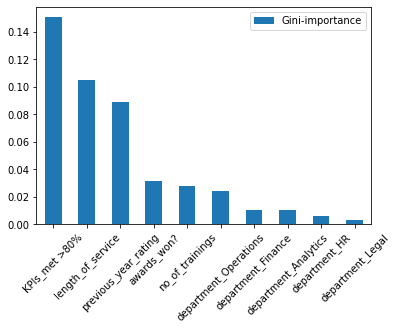

In [ ]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.head(10).sort_values(by='Gini-importance', ascending=False).plot(kind='bar', rot=45)


The most important features that impacted the Employee promotion predcition are as follows :

1)  KPIs that were met greater than 80%

2) Length of Service

3) Previous Year Rating 

4) Awards won

5) Number of Trainings


Conclusion:

In this use-case, we built a predictive model to understand the driving factors behind an employee promotion on the available data. Exploratory data analysis was done and a Random Forest Algorithm with 100 trees were built. The Model gave an Accuracy of 75% and a high re-call value of 83% on the promotion occurence class. The most important features(top 3) that impacted the promotion were KPIs met by the employees, the length of the service and the Previous Year Rating.